In [1]:
#libraries
# This Python 3 environment
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import seaborn as sns
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [2]:
df_tweets = pd.read_csv('C:/Users/arjun_0ozfyct/Documents/CAPSTONE/required_data_0803.csv')

In [3]:
df_tweets.head()

,Unnamed: 0,created_at,id,text,full_text,length,source,user_id,user_name,user_screen_name,location,followers_count,friends_count,retweet_count
0,0,Sat Aug 03 17:06:38 +0000 2019,1157699308595974144,@sanj3011 @priyapyadav18 Absolutely no negativ...,NaN,86,android,17675474,'sandeeproy1','sandeeproy1',"'NCR, Kol, Mum, BLR, HYD, Pune'",906,1589,0
1,1,Sat Aug 03 17:06:39 +0000 2019,1157699313054568448,RT @MONU1941: I will not tweet on J&amp;K situ...,NaN,147,android,781856991803236352,'kunju106','kunju106','url',318,466,147
2,2,Sat Aug 03 17:06:40 +0000 2019,1157699314279260160,RT @iammegha12: Pic 1 - Any tampering with Art...,NaN,148,android,1056471948740325376,'Dharmen42518702','Dharmen42518702',"'Bareilly, India'",3353,4998,43
3,3,Sat Aug 03 17:06:40 +0000 2019,1157699315990745088,RT @HShams64: The impure thoughts and stupid n...,NaN,140,android,4841068157,'alihanjra4u','alihanjra4u',"' HafizAbad Punjab, Pakistan'",3511,2701,2
4,4,Sat Aug 03 17:06:40 +0000 2019,1157699316577910786,RT @salimkaskar3: This is the kind of developm...,NaN,140,android,1023204507667202049,'salimkaskar3','salimkaskar3',"', '",4084,102,1


In [4]:
#create new tweets column
df_tweets["tweets"] = df_tweets["text"]

In [5]:
#text manipulation
import  re
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

#function to remove special characters , punctions ,stop words ,
#digits ,hyperlinks and case conversion
def string_manipulation(df,column)  : 
    #extract hashtags
    df["hashtag"]  = df[column].str.findall(r'#.*?(?=\s|$)')
    #extract twitter account references
    df["accounts"] = df[column].str.findall(r'@.*?(?=\s|$)')
    
    #remove hashtags and accounts from tweets
    df[column] = df[column].str.replace(r'@.*?(?=\s|$)'," ")
    df[column] = df[column].str.replace(r'#.*?(?=\s|$)'," ")
    
    #convert to lower case
    df[column] = df[column].str.lower()
    #remove hyperlinks
    df[column] = df[column].apply(lambda x:re.split('https:\/\/.*',str(x))[0])
    #remove punctuations
    df[column] = df[column].str.replace('[^\w\s]'," ")
    #remove special characters
    df[column] = df[column].str.replace("\W"," ")
    #remove digits
    df[column] = df[column].str.replace("\d+"," ")
    #remove under scores
    df[column] = df[column].str.replace("_"," ")
    #remove stopwords
    df[column] = df[column].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_words)]))
    return df

tweets = string_manipulation(df_tweets,"text")


In [8]:
BJP_count = 0
for i in df_tweets.tweets:
    if ('BJP' or 'bjp' or 'modi' or '@narendramodi') in i:
        BJP_count = BJP_count + 1
print(BJP_count)

5109


In [9]:
congress_count = 0
for i in df_tweets.tweets:
    if ('Congress' or '@rahulgandhi') in i:
        congress_count = congress_count + 1
print(congress_count)

989


In [10]:
bjp_df=pd.DataFrame()
#BJP_count = 0
BJP=[]
for i in df_tweets.tweets:
    if ('BJP' or 'bjp' or 'modi' or '@narendramodi') in i:
        BJP.append(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", i.lower()).split()))
bjp_df['BJP'] = BJP

In [11]:
bjp_df.head()

,BJP
0,rt the bjp government can t build anything it ...
1,rt thore working hard working happy visible hi...
2,rt the bjp government can t build anything it ...
3,rt thore working hard working happy visible hi...
4,rt bjp issues whip for its rajya sabha and lok...


In [12]:
congress_df=pd.DataFrame()
congress=[]
congress_count = 0
for i in df_tweets.tweets:
    if ('Congress' or '@rahulgandhi') in i:
        congress.append(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", i.lower()).split()))
congress_df['congress'] = congress

In [13]:
congress_df.head()

,congress
0,rt this happening all over india yogendrayadav...
1,rt this happening all over india yogendrayadav...
2,rt this happening all over india yogendrayadav...
3,rt tripura panchayat poll 2019 results total s...
4,rt in upa congress defence in nda bjp aao bhsd...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx

In [15]:
def network_tweets(df,frequency,color,title) :
    #documents
    documents  = df["BJP"].tolist()
    vectorizer = CountVectorizer()
    vec        = vectorizer.fit_transform(documents)
    vec_t      = vectorizer.fit_transform(documents).transpose()
    
    #adjecency matrix for words
    adj_mat    = pd.DataFrame((vec_t * vec).toarray(),
                              columns = vectorizer.get_feature_names(),
                              index    = vectorizer.get_feature_names()
                             )
    # #stacking combinations
    adj_mat_stack   = adj_mat.stack().reset_index()
    adj_mat_stack.columns = ["link_1","link_2","count"]
    
    #drop same word combinations
    adj_mat_stack   = adj_mat_stack[adj_mat_stack["link_1"] !=
                                    adj_mat_stack["link_2"]] 
    
    #subset dataframe with combination count greater than 25 times
    network_sub = adj_mat_stack[adj_mat_stack["count"] > frequency]
    
    #plot network
    H = nx.from_pandas_edgelist(network_sub,"link_1","link_2",["count"],
                                create_using = nx.DiGraph())

    ax = plt.figure(figsize = (11,11))
    nx.draw(H,with_labels = True,alpha = .7,node_shape = "H",
            width = 1,node_color = color,
            font_weight = "bold",style = "solid", arrowsize = 15 ,
            font_color = "white",linewidths = 10,edge_color = "grey",
            node_size = 1300,pos = nx.kamada_kawai_layout(H))
    plt.title(title,color = "white")
    ax.set_facecolor("k")
    

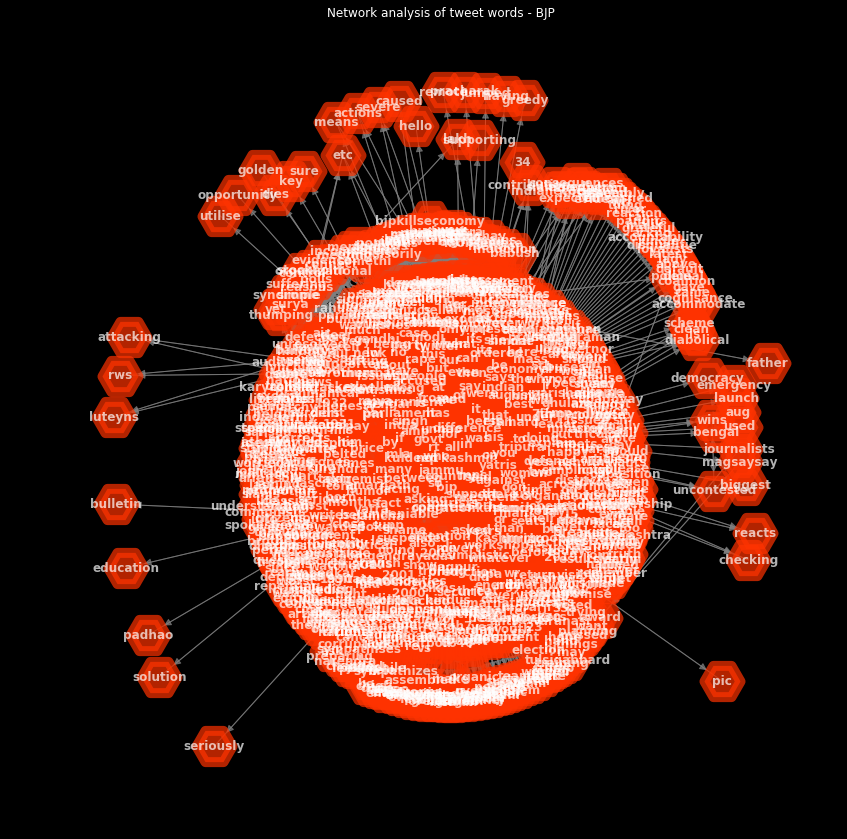

In [16]:
network_tweets(bjp_df,10,"#FF3300","Network analysis of tweet words - BJP")

In [17]:
def network_tweets(df,frequency,color,title) :
    #documents
    documents  = df["congress"].tolist()
    vectorizer = CountVectorizer()
    vec        = vectorizer.fit_transform(documents)
    vec_t      = vectorizer.fit_transform(documents).transpose()
    
    #adjecency matrix for words
    adj_mat    = pd.DataFrame((vec_t * vec).toarray(),
                              columns = vectorizer.get_feature_names(),
                              index    = vectorizer.get_feature_names()
                             )
    # #stacking combinations
    adj_mat_stack   = adj_mat.stack().reset_index()
    adj_mat_stack.columns = ["link_1","link_2","count"]
    
    #drop same word combinations
    adj_mat_stack   = adj_mat_stack[adj_mat_stack["link_1"] !=
                                    adj_mat_stack["link_2"]] 
    
    #subset dataframe with combination count greater than 25 times
    network_sub = adj_mat_stack[adj_mat_stack["count"] > frequency]
    
    #plot network
    H = nx.from_pandas_edgelist(network_sub,"link_1","link_2",["count"],
                                create_using = nx.DiGraph())

    ax = plt.figure(figsize = (11,11))
    nx.draw(H,with_labels = True,alpha = .7,node_shape = "H",
            width = 1,node_color = color,
            font_weight = "bold",style = "solid", arrowsize = 15 ,
            font_color = "white",linewidths = 10,edge_color = "grey",
            node_size = 1300,pos = nx.kamada_kawai_layout(H))
    plt.title(title,color = "white")
    ax.set_facecolor("k")
    

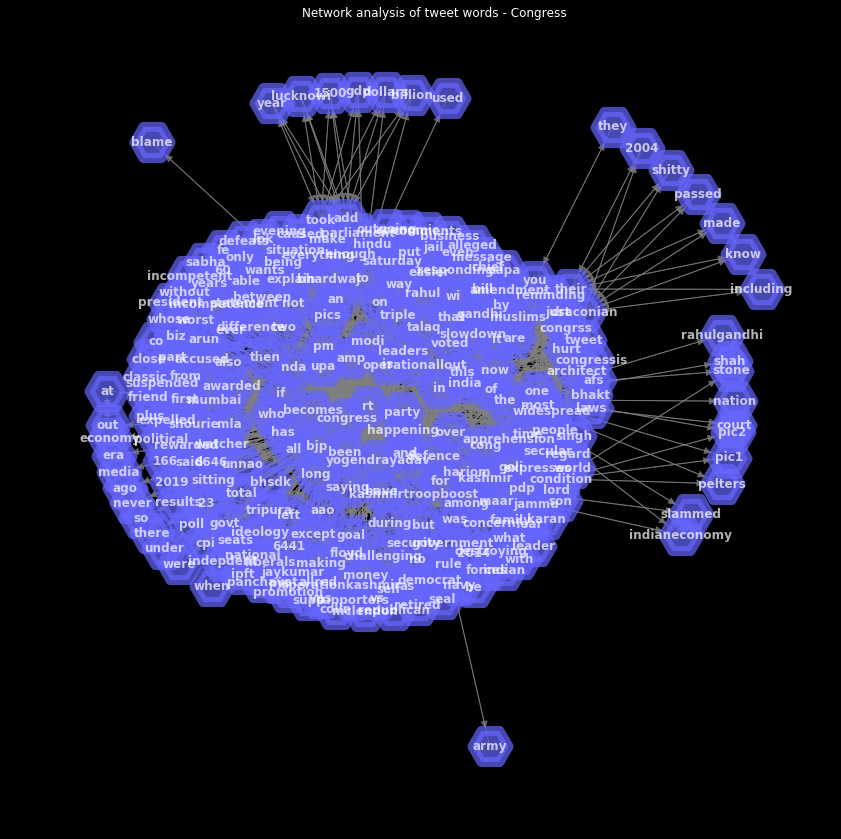

In [18]:
network_tweets(congress_df,10,"#6666FF","Network analysis of tweet words - Congress")

In [19]:
df_tweets.head()

,Unnamed: 0,created_at,id,text,full_text,length,source,user_id,user_name,user_screen_name,location,followers_count,friends_count,retweet_count,tweets,hashtag,accounts
0,0,Sat Aug 03 17:06:38 +0000 2019,1157699308595974144,absolutely negativity positively distrust modi,NaN,86,android,17675474,'sandeeproy1','sandeeproy1',"'NCR, Kol, Mum, BLR, HYD, Pune'",906,1589,0,@sanj3011 @priyapyadav18 Absolutely no negativ...,[],"[@sanj3011, @priyapyadav18]"
1,1,Sat Aug 03 17:06:39 +0000 2019,1157699313054568448,rt tweet j amp k situation till clarity thing ...,NaN,147,android,781856991803236352,'kunju106','kunju106','url',318,466,147,RT @MONU1941: I will not tweet on J&amp;K situ...,[],[@MONU1941:]
2,2,Sat Aug 03 17:06:40 +0000 2019,1157699314279260160,rt pic tampering article amp render treaty acc...,NaN,148,android,1056471948740325376,'Dharmen42518702','Dharmen42518702',"'Bareilly, India'",3353,4998,43,RT @iammegha12: Pic 1 - Any tampering with Art...,[],[@iammegha12:]
3,3,Sat Aug 03 17:06:40 +0000 2019,1157699315990745088,rt impure thoughts stupid nature going worst h...,NaN,140,android,4841068157,'alihanjra4u','alihanjra4u',"' HafizAbad Punjab, Pakistan'",3511,2701,2,RT @HShams64: The impure thoughts and stupid n...,"[#Modi, #IOK., #India…]",[@HShams64:]
4,4,Sat Aug 03 17:06:40 +0000 2019,1157699316577910786,rt kind development modi deliver vikas modi pr...,NaN,140,android,1023204507667202049,'salimkaskar3','salimkaskar3',"', '",4084,102,1,RT @salimkaskar3: This is the kind of developm...,[],[@salimkaskar3:]


Text(0.5,1,'users tweeting')

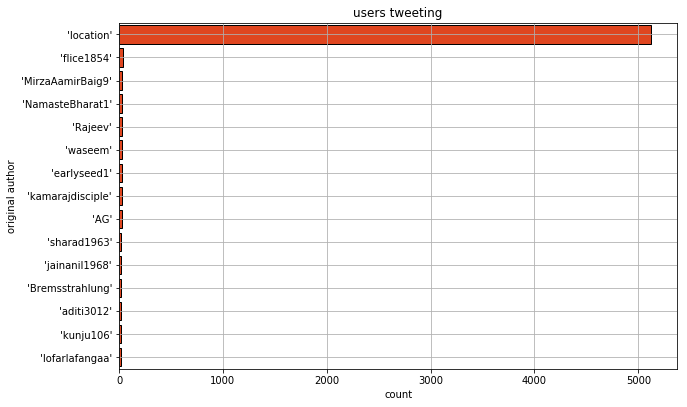

In [28]:
plt.figure(figsize = (10,14))

plt.subplot(211)
authors = df_tweets["user_name"].value_counts().reset_index()
sns.barplot(y = authors["index"][:15] , 
            x = authors["user_name"][:15] ,
            linewidth = 1,edgecolor = "k",color = "#FF3300")
plt.grid(True)
plt.xlabel("count")
plt.ylabel("original author")
plt.title("users tweeting")

In [33]:
#Most Popular Tweet
for i in df_tweets[df_tweets.retweet_count == df_tweets.retweet_count.max()].tweets:
    print(i)
print('Total Retweets : ',df_tweets.retweet_count.max())

RT @nichegamer: TFW psychotic nuclear warhead-dropping Gandhi is real now https://t.co/z297welKpb
Total Retweets :  68197
